# Univariate Time Series

<b>Definition</b> from <a href='https://onlinecourses.science.psu.edu/stat510/node/47'>here</a>: <i>a sequence of measurements of the same variable collected over time</i>. Examples: stock prices, demand, housing prices.

In pandas a univariate time series is a Series object where the index is a "timestamp".

## Stock prices

<p><b>to install:</b> you should install pandas_datareader. You can install it by following either of these options:</p>
<p>
<ul>
<li>open canopy, select package manager, select available, and then type <i>pandas_datareader</i>
<li>open a terminal and type <i>pip install pandas_datareader</i>
</ul>
</p>

The following code creates a Series object <i>stock</i> with the Google stock closing prices. Don't worry about undestanding this code.

In [1]:
import pandas as pd
import pandas_datareader.data as web # if this line gives you an error, install pandas_datareader
import datetime    
ticker = 'GOOGL'

start = datetime.datetime(2004, 7, 31) # day from which to collect the data
end = datetime.datetime(2017, 4, 17) # last day of data to collect
df = web.DataReader(ticker, 'google', start, end)

dates =[]
for x in range(len(df)):
    newdate = str(df.index[x])
    newdate = newdate[0:10]
    dates.append(newdate)
df['dates'] = dates

# Create a Series called stock
stock = df.Close
stock.name = ticker

The following command will plot the stock price

Populating the interactive namespace from numpy and matplotlib


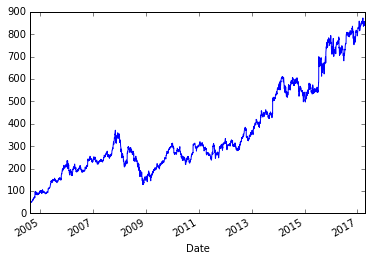

In [2]:
%pylab inline
stock.plot()

## Exploring a Time Series

This Series object has one entry for each trading day. The index (of type <i>datetime64</i>) is the day and the value (of type <i>float64</i>) is the closing price.

Let's take a look at the first 10 days of data

In [3]:
stock.head(10)

Date
2004-08-19    50.22
2004-08-20    54.21
2004-08-23    54.75
2004-08-24    52.49
2004-08-25    53.05
2004-08-26    54.01
2004-08-27    53.13
2004-08-30    51.06
2004-08-31    51.24
2004-09-01    50.18
Name: GOOGL, dtype: float64

Let's take a look at the last 10 days of data

In [4]:
stock.tail(10)

Date
2017-04-03    856.75
2017-04-04    852.57
2017-04-05    848.91
2017-04-06    845.10
2017-04-07    842.10
2017-04-10    841.70
2017-04-11    839.88
2017-04-12    841.46
2017-04-13    840.18
2017-04-17    855.13
Name: GOOGL, dtype: float64

<b>Question 1</b><br/>What day had the largest stock price? 

In [5]:
print 'On ' + str(stock.idxmax()) + ', the stock price was ' + str(stock[stock.idxmax()])

On 2017-03-17 00:00:00, the stock price was 872.37


<b>Question 2</b><br/>What are the 10 days with largest stock price? Report both the day and the price.

In [6]:
stock.nlargest(10)

Date
2017-03-17    872.37
2017-03-16    870.00
2017-03-15    868.39
2017-03-20    867.91
2017-03-14    865.91
2017-03-13    864.58
2017-03-10    861.40
2017-01-25    858.45
2017-03-09    857.84
2017-01-26    856.98
Name: GOOGL, dtype: float64

<b>Question 3</b><br/>How much profit (%) would we make if we bought at the beginning and sold everything on the last day? Do not type in any date.

In [7]:
(stock.iloc[-1] - stock.iloc[0]) / stock.iloc[0] * 100

1602.7678215850258

<b>Question 4</b><br/>
What is the moving average of the price at each trading session? Use a 50-trading-days window. <i>Hint</i>: Explore the method <i>rolling</i>

In [8]:
rol = stock.rolling(50)
rol.mean()

Date
2004-08-19         NaN
2004-08-20         NaN
2004-08-23         NaN
2004-08-24         NaN
2004-08-25         NaN
2004-08-26         NaN
2004-08-27         NaN
2004-08-30         NaN
2004-08-31         NaN
2004-09-01         NaN
2004-09-02         NaN
2004-09-03         NaN
2004-09-07         NaN
2004-09-08         NaN
2004-09-09         NaN
2004-09-10         NaN
2004-09-13         NaN
2004-09-14         NaN
2004-09-15         NaN
2004-09-16         NaN
2004-09-17         NaN
2004-09-20         NaN
2004-09-21         NaN
2004-09-22         NaN
2004-09-23         NaN
2004-09-24         NaN
2004-09-27         NaN
2004-09-28         NaN
2004-09-29         NaN
2004-09-30         NaN
                ...   
2017-03-06    830.9158
2017-03-07    831.6948
2017-03-08    832.5740
2017-03-09    833.5748
2017-03-10    834.6042
2017-03-13    835.8044
2017-03-14    837.0650
2017-03-15    838.5838
2017-03-16    839.8236
2017-03-17    841.1156
2017-03-20    842.2134
2017-03-21    842.7120
2017-0

<b>Question 5</b><br/>
Consider this investment strategy: buy on day x and then sell after 5 days (on day x+5). Find the expected profit (in %) of this operation. <i>Hint</i>: explore the method <i>shift</i>

In [9]:
(((stock.shift(-5) - stock) / stock) * 100).describe()

count    3181.000000
mean        0.532125
std         4.418287
min       -17.882273
25%        -1.821205
50%         0.559835
75%         2.700174
max        32.366325
Name: GOOGL, dtype: float64

<b>Question 6</b><br/>
Consider this investment strategy: buy whenever the price goes above the 20-day moving average, and then sell after 5 trading sessions. How much profit (in %) would we make on average?

In [10]:
rol = stock.rolling(20).mean()
profitMade = (stock.shift(-5) - stock) / stock
(profitMade[stock > rol]* 100).describe()

count    1847.000000
mean        0.626925
std         4.213090
min       -15.115709
25%        -1.678517
50%         0.578256
75%         2.659993
max        32.366325
Name: GOOGL, dtype: float64

## Median prices of single family homes in zip code 95050

The file <i>santaclara_sfh.csv</i> was downloaded from <a href= 'http://redfin.com'>redfin.com</a>. For each end of month day, this file reports the median price of a single family home (sfh) in zip code 95050 over the previous 3 months. The data starts from 2012-01-31 and ends on 2017-02-28.

The following code loads and cleans the data set <i>santaclara_sfh.csv</i>, which you should copy into the same folder as this Jupyter notebook. For the moment, do not worry about understanding the code.

In [11]:
# don't worry about understanding this code
df = pd.read_csv('santaclara_sfh.csv')
df['date'] = pd.to_datetime(df.date) # make the date column of type datetime
df['median_sfh_price_past_3_months'] = df.median_sfh_price_past_3_months + 0.0 # make the price column of type float
df.set_index('date',inplace=True) # make date the index 
housing = df['median_sfh_price_past_3_months'] # take the series of median prices
housing.name = 'housing'

Let's take a look at the oldest prices

In [12]:
housing.head()

date
2012-01-31    520000.0
2012-02-29    545000.0
2012-03-31    545500.0
2012-04-30    527000.0
2012-05-31    550000.0
Name: housing, dtype: float64

Remember that each price is the median over the previous three months. So, for example, the median sale price in the period from 2012-02-01 to 2012-04-30 was $527,000. Let's plot it.

Populating the interactive namespace from numpy and matplotlib


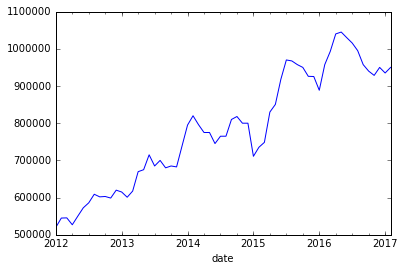

In [13]:
%pylab inline
housing.plot()

## Are housing prices correlated to stock prices?

<p>To anwer this question, we first need to align the two Series. The Series <i>housing</i> has one entry for each ending day of each month and a value that is the 3-month moving average; the series <i>stock</i> has one entry for each <b>trading day</b> and the value that is the closing price. </p>
<p>To align the two Series, we will create a new Series of stock prices that has only one entry for every month-end-day and reports the 3-month moving median price of the stock</p>

<p>We will do the following:
<ol>
<li>Pad <i>stock</i> so that there are no missing days (currently, holidays are missing)
<li>Compute the 3-month moving median of <i>stock</i>
<li>Retain only the end-of-month days in <i>stock</i>
</ol>
</p>


#### Step #1: Pad stock so that there are no missing days (currently, holidays are missing)

In [14]:
padded = stock.asfreq('1D',method='ffill')

#### Step #2: Compute the 90-day moving average of stock

In [16]:
movmed = padded.rolling(90).median()

#### Step #3: Retain the same days as in the housing Series

In [17]:
mod_stock = movmed[housing.index]

### Compute correlation

Are stock and housing prices correlated?

In [18]:
housing.corr(mod_stock)

0.93596529541032703

Uh... yes, they are strongly correlated

Let's plot them

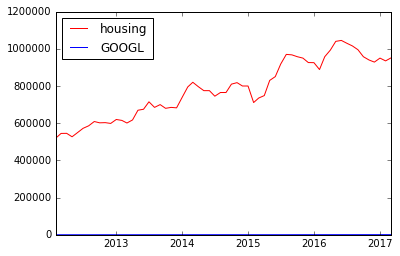

In [19]:
import matplotlib.pyplot as plt

plt.plot(housing,'r') # r for "red" 
plt.plot(mod_stock,'b')  # b for "blue"
plt.legend(loc=2)
plt.show()

mmm... the problem is that the two scales are very different: housing is about 1M dollars while the stock price is in the order of hundreds of dollars

Let's normalize them so that the value on the first day (2012-01-31) is 1 for both series.

In [20]:
norm_housing = housing / housing[0]

In [21]:
norm_stock = mod_stock / mod_stock[0]

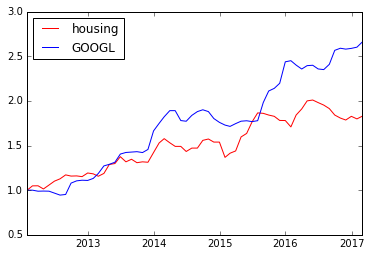

In [22]:
import matplotlib.pyplot as plt

plt.plot(norm_housing,'r') # r for "red" 
plt.plot(norm_stock,'b')  # b for "blue"
plt.legend(loc=2)
plt.show()